In [1]:
import pandas as pd
import wrangle 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', header=None)
df.head(2)

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61


In [3]:
df = df.rename(columns={0:'date',1:'time',2:'page',3:'user', 4:'cohort',5:'ip' })
df

,date,time,page,user,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [4]:
# this is the code that begins to awser question #1
df.page.value_counts().head(10)

page
/                           50313
search/search_index.json    19519
javascript-i                18983
toc                         18297
java-iii                    13733
html-css                    13635
java-ii                     12685
spring                      12524
jquery                      11525
mysql                       11033
Name: count, dtype: int64

In [5]:
# this code gets the awnser to number one entirely
# size allows us to get the counts for two 
q_one = df.groupby(['cohort', 'page']).size().reset_index(name='count')
q_one

,cohort,page,count
0,1.0,/,626
1,1.0,0_Classification_Algorithms,1
2,1.0,2.0_Intro_Stats,1
3,1.0,5.0_Intro_Regression,2
4,1.0,7.0_Intro_Clustering,2
...,...,...,...
13560,139.0,jquery,4
13561,139.0,jquery/essential-methods/attributes-and-css,1
13562,139.0,search/search_index.json,9
13563,139.0,spring,2


In [6]:
top_lessons = q_one.groupby('page')['count'].sum().sort_values(ascending  = False)
top_lessons.head()

page
/                           45854
javascript-i                18203
toc                         17591
search/search_index.json    17534
java-iii                    13166
Name: count, dtype: int64

In [7]:
# can use basketball deep learnign code to break the cohorts apart and comare their top 5 taht way
q_one.sort_values(by='count', ascending=False).head(10)

,cohort,page,count
5922,28.0,/,6340
11247,59.0,/,2980
4528,24.0,/,2101
9731,53.0,/,2038
8643,34.0,/,1967
12221,62.0,toc,1866
3576,22.0,/,1828
7038,28.0,javascript-i,1817
7325,29.0,/,1798
10680,57.0,/,1727


# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [8]:
# Exclude specified pages
exclude_pages = ['/', 'toc']
# Combine 'date' and 'time' columns and convert to datetime type
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.drop(columns=['date', 'time'])

# Handle missing values: For simplicity, let's drop rows with any missing values for now
df_clean = df.dropna()

# Quick exploration: Check the unique values in 'page' and 'cohort' and their frequencies
unique_pages = df_clean['page'].nunique()
unique_cohorts = df_clean['cohort'].nunique()
page_freq = df_clean['page'].value_counts().head(10)  # top 10 pages
cohort_freq = df_clean['cohort'].value_counts()  # frequency of each cohort

(unique_pages, unique_cohorts, page_freq, cohort_freq)


(2224,
 47,
 page
 /                           45854
 javascript-i                18203
 toc                         17591
 search/search_index.json    17534
 java-iii                    13166
 html-css                    13127
 java-ii                     12177
 spring                      11883
 jquery                      11041
 mysql                       10611
 Name: count, dtype: int64,
 cohort
 28.0     84031
 33.0     40730
 29.0     38096
 62.0     37109
 53.0     36902
 24.0     35636
 57.0     33844
 56.0     33568
 51.0     32888
 59.0     32015
 22.0     30926
 58.0     29855
 32.0     29356
 23.0     28534
 52.0     28033
 26.0     27749
 34.0     26538
 25.0     25586
 31.0     25359
 132.0    23691
 55.0     21581
 27.0     20743
 61.0     17713
 134.0    16623
 135.0    16397
 133.0    14715
 14.0      9587
 1.0       8890
 137.0     8562
 21.0      7444
 138.0     7276
 17.0      4954
 13.0      2845
 18.0      2158
 8.0       1712
 139.0     1672
 19.0      1237
 16.

In [9]:
# there are 2224 unique values pages visited
# most frequent visited pages are  'search/search_index.json' 

# cohort id 28 has the highest page visits (84,031) followed by cohort 33 with 40,730

In [10]:
# Grouping data by 'cohort' and 'page' to get the count of visits per page per cohort
cohort_page_visits = df_clean.groupby(['cohort', 'page']).size().reset_index(name='visit_count')

# Sorting values to identify pages with high visits in specific cohorts
sorted_cohort_page_visits = cohort_page_visits.sort_values(by='visit_count', ascending=False)

# Displaying top visited pages per cohort
top_visited_pages_per_cohort = sorted_cohort_page_visits.drop_duplicates(subset=['cohort'])
top_visited_pages_per_cohort.head(10)


,cohort,page,visit_count
5922,28.0,/,6340
11247,59.0,/,2980
4528,24.0,/,2101
9731,53.0,/,2038
8643,34.0,/,1967
12221,62.0,toc,1866
3576,22.0,/,1828
7325,29.0,/,1798
10680,57.0,/,1727
9991,55.0,/,1712


In [11]:
# Exclude generic or non-informative pages
exclude_pages = ['/', 'toc', 'search/search_index.json', 'index.html']

# Filter the dataframe to exclude these pages
filtered_cohort_page_visits = sorted_cohort_page_visits[~sorted_cohort_page_visits['page'].isin(exclude_pages)]

# Displaying top visited lesson pages per cohort (excluding generic pages)
top_visited_lesson_per_cohort = filtered_cohort_page_visits.drop_duplicates(subset=['cohort'])
top_visited_lesson_per_cohort.head(10)


,cohort,page,visit_count
7038,28.0,javascript-i,1817
11464,59.0,classification/overview,1109
8532,33.0,javascript-i,1003
12098,62.0,javascript-i,926
11111,58.0,javascript-i,910
13110,135.0,javascript-i,907
7518,29.0,javascript-i,897
9328,51.0,javascript-i,896
4773,24.0,javascript-i,884
9862,53.0,java-iii,786


- "javascript-i" is the most frequently visited lesson page for several cohorts (28, 33, 62, 58, 135, 29, 51, and 24).
- Cohort 59 visited "classification/overview" 1109 times, which stands out as a specific lesson page.
- Cohort 53 visited "java-iii" 786 times.

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


In [12]:
user_access_count = df['user'].value_counts()
user_access_count.describe().T

count      981.000000
mean       917.658512
std       1208.871376
min          1.000000
25%        187.000000
50%        692.000000
75%       1297.000000
max      17913.000000
Name: count, dtype: float64

# 7. Which lessons are least accessed?


In [17]:
# Exclude non-lesson pages
exclude_pages = ['/', 'toc', 'search/search_index.json']

# Filter the data to focus on potential lesson pages
lesson_page_data = df_clean[~df_clean['page'].isin(exclude_pages)]

# Group by 'page' and count accesses
page_access_counts = lesson_page_data['page'].value_counts().reset_index(name='access_count')

# Identify least accessed pages
least_accessed_pages = page_access_counts.sort_values(by='access_count', ascending=True).head(10)

least_accessed_pages


,page,access_count
2220,appendix/professional-development/post-intervi...,1
1900,quizes,1
1901,t9-solution/index.html,1
1902,131,1
1903,132,1
1904,130,1
1905,html-css/elecments,1
1906,dendogram_sample.jpeg,1
1907,10.00_Intro.html,1
1908,habn,1


- All the listed pages have been accessed only once, making them the least accessed.
- Entries, like 'dendogram_sample.jpeg', '131', or '132', might not be lesson pages but rather files or other resources.


In [18]:
# Group by 'cohort' and 'page' and count accesses
cohort_page_access_counts = df.groupby(['cohort', 'page']).size().reset_index(name='access_count')

# Filter for pages accessed only once
single_access_cohort_pages = cohort_page_access_counts[cohort_page_access_counts['access_count'] == 1]

# Number of cohort-page pairs accessed only once and a few examples
num_single_access_cohort_pages = single_access_cohort_pages.shape[0]
example_single_access_cohort_pages = single_access_cohort_pages.head(10)

(num_single_access_cohort_pages, example_single_access_cohort_pages)


(2949,
     cohort                                            page  access_count
 1      1.0                     0_Classification_Algorithms             1
 2      1.0                                 2.0_Intro_Stats             1
 5      1.0                                8.0_Intro_Module             1
 6      1.0                                       About_NLP             1
 7      1.0                         Module_6_Classification             1
 10     1.0                    appendix/angular/controllers             1
 11     1.0                   appendix/angular/dependencies             1
 12     1.0                         appendix/angular/models             1
 13     1.0                     appendix/angular/templating             1
 15     1.0  appendix/capstone-workbook/sw-project-planning             1)

- 2,949 instances where a cohort accessed a page only once.
- Cohort 1.0 has multiple pages that were accessed only once, and some of them seem like different lessons or modules.


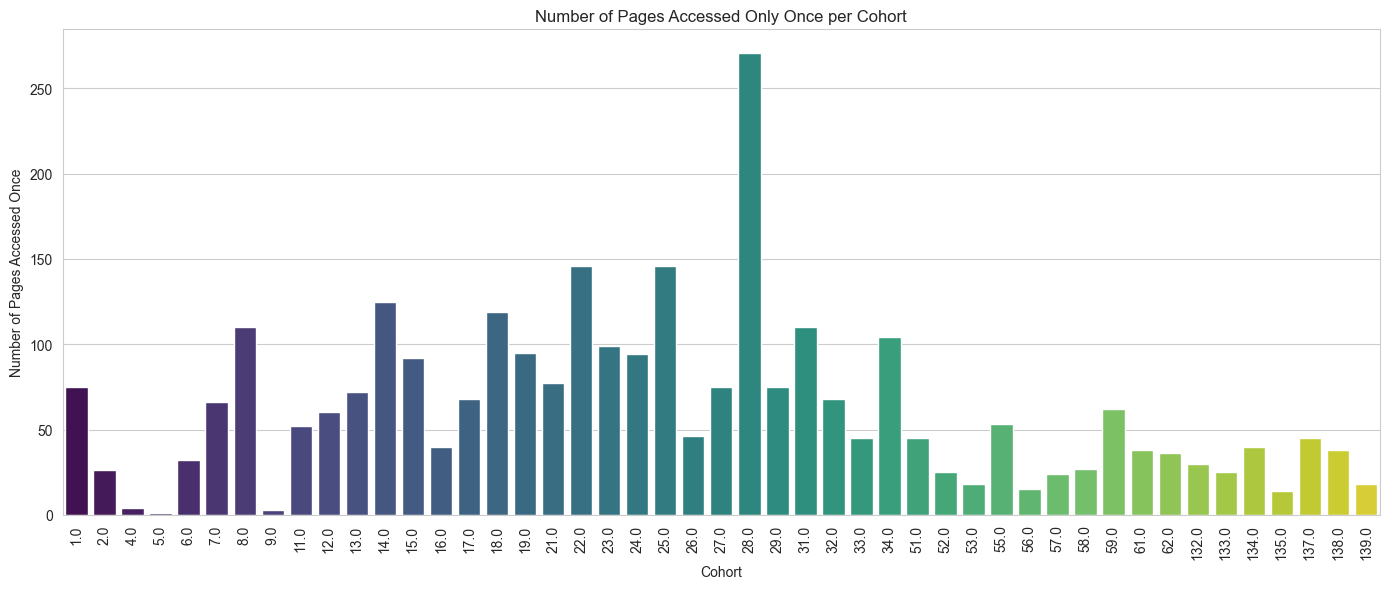

In [19]:
sns.set_style("whitegrid")

# Group by 'cohort' and count the number of single accesses
single_access_counts_per_cohort = single_access_cohort_pages['cohort'].value_counts().reset_index()
single_access_counts_per_cohort.columns = ['cohort', 'single_access_count']

# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='cohort', y='single_access_count', data=single_access_counts_per_cohort, palette="viridis")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel("Cohort")
plt.ylabel("Number of Pages Accessed Once")
plt.title("Number of Pages Accessed Only Once per Cohort")
plt.tight_layout()

# Show plot
plt.show()


- In the bar plot, each bar represents a cohort and the height of the bar indicates the number of pages that were accessed only once by that cohort.
- cohort 28.0 have a noticeably higher number of pages that were accessed only once compared to others.

